<a href="https://colab.research.google.com/github/diro5t/deep_quadric_learning/blob/main/TorchLinMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(C) Dirk Roeckmann 2023

Simple PyTorch MNIST ~100K parameter model classifier with linear layers: 784-128-10, batch size of 128 and 20 epochs.

NOTE: The goal is NOT to find the minimum model or a certain target accuracy, but to compare it with a ~25K quadric model which achieves comparable accuracy after the same number of epochs (see TorchQuadMNIST.ipynb).

More about quadric models here:

https://github.com/diro5t/deep_quadric_learning

This paradigm is based on my research here:

https://scholar.google.com/citations?hl=en&user=hamuGh4AAAAJ

In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
transf = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,)),])

In [ ]:
batch_size = 128

train_set = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transf)
test_set = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transf)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True)

In [ ]:
img_iter = iter(train_loader)
images, labels = next(img_iter)

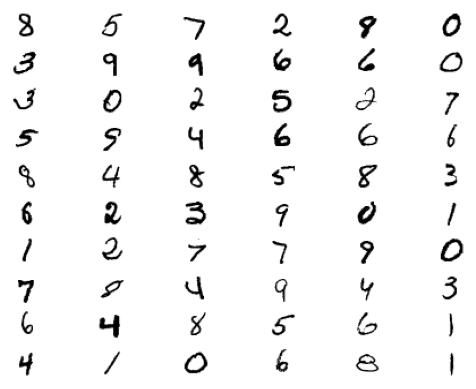

In [ ]:
figure = plt.figure()
img_num = 60
for index in range(1, img_num + 1):
    plt.subplot(10, 6, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 10),
                      nn.LogSoftmax(dim=1))

In [ ]:
# total number of model parameters
sum(p.numel() for p in model.parameters())

101770

In [ ]:
loss_fn = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
epochs = 20
for e in range(epochs):
    train_loss = 0
    for images, labels in train_loader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        output = model(images)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, train_loss/len(train_loader)))

Epoch 0 - Training loss: 0.6781163818038094
Epoch 1 - Training loss: 0.33331811793450355
Epoch 2 - Training loss: 0.2894533862754988
Epoch 3 - Training loss: 0.2582498226147979
Epoch 4 - Training loss: 0.23217386137574975
Epoch 5 - Training loss: 0.21112761065077934
Epoch 6 - Training loss: 0.19249198318862204
Epoch 7 - Training loss: 0.1767189907335015
Epoch 8 - Training loss: 0.16325940579366582
Epoch 9 - Training loss: 0.15136547358845598
Epoch 10 - Training loss: 0.1415880021732499
Epoch 11 - Training loss: 0.13325830972366243
Epoch 12 - Training loss: 0.12466952244419532
Epoch 13 - Training loss: 0.11880632279428846
Epoch 14 - Training loss: 0.11216575473245145
Epoch 15 - Training loss: 0.1068294606308566
Epoch 16 - Training loss: 0.10135210018708253
Epoch 17 - Training loss: 0.09712600206801378
Epoch 18 - Training loss: 0.09263223558584892
Epoch 19 - Training loss: 0.08872691561370644


In [ ]:
corrects, all = 0, 0
for images,labels in train_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.inference_mode():
        logps = model(img)
    ps = torch.exp(logps)
    prob = list(ps.numpy()[0])
    inf_label = prob.index(max(prob))
    true_label = labels.numpy()[i]
    if(true_label == inf_label):
      corrects += 1
    all += 1

print("Number of trained images=", all)
print("\nModel Training Accuracy =", (corrects / all))

Number of trained images= 60000

Model Training Accuracy = 0.9771


In [ ]:
corrects, all = 0, 0
for images,labels in test_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.inference_mode():
        logps = model(img)
    ps = torch.exp(logps)
    prob = list(ps.numpy()[0])
    inf_label = prob.index(max(prob))
    true_label = labels.numpy()[i]
    if(true_label == inf_label):
      corrects += 1
    all += 1

print("Number of tested images=", all)
print("\nModel Test Accuracy =", (corrects / all))

Number of tested images= 10000

Model Test Accuracy = 0.9716
